### Individual Homework

#### Enter your name here:

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Analysis of movies IMDB dataset**

We will look at a ***subset*** sample of movies, taken from the [Kaggle IMDB 5000 movie dataset](https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset)

In [18]:
movies = pd.read_csv('../Data/movies.csv')
movies

,title,genre,director,year,duration,gross,budget,cast_facebook_likes,votes,reviews,rating
0,Avatar,Action,James Cameron,2009,178,760505847,237000000,4834,886204,3777,7.9
1,Titanic,Drama,James Cameron,1997,194,658672302,200000000,45223,793059,2843,7.7
2,Jurassic World,Action,Colin Trevorrow,2015,124,652177271,150000000,8458,418214,1934,7.0
3,The Avengers,Action,Joss Whedon,2012,173,623279547,220000000,87697,995415,2425,8.1
4,The Dark Knight,Action,Christopher Nolan,2008,152,533316061,185000000,57802,1676169,5312,9.0
...,...,...,...,...,...,...,...,...,...,...,...
2956,Locker 13,Thriller,Bruce Dellis,2014,95,2468,300000,2048,241,15,4.8
2957,The Ghastly Love of Johnny X,Comedy,Paul Bunnell,2012,106,2436,2000000,1611,344,113,5.7
2958,Detention of the Dead,Comedy,Alex Craig Mann,2012,87,1332,500000,2251,2038,49,4.6
2959,The Trials of Darryl Hunt,Crime,Ricki Stern,2006,106,1111,200000,2,771,21,7.7


Besides the obvious variables of `title`, `genre`, `director`, `year`, and `duration`, the rest of the variables are as follows:

-   `gross` : The gross earnings in the US box office, not adjusted for inflation
-   `budget`: The movie's budget
-   `cast_facebook_likes`: the number of facebook likes cast memebrs received
-   `votes`: the number of people who voted for (or rated) the movie in IMDB
-   `reviews`: the number of reviews for that movie
-   `rating`: IMDB average rating

**Produce a table with the count of movies by genre, ranked in descending order**


In [19]:
genre_counts = movies['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'movie_count']
genre_counts

,genre,movie_count
0,Comedy,848
1,Action,738
2,Drama,498
3,Adventure,288
4,Crime,202
5,Biography,135
6,Horror,131
7,Animation,35
8,Fantasy,28
9,Documentary,25


**Produce a table with the average gross earning and budget (`gross` and `budget`) by genre. Calculate a variable `return_on_budget` which shows how many \$ did a movie make at the box office for each \$ of its budget. Ranked genres by this `return_on_budget` in descending order**

In [20]:
genre_financials = movies.groupby('genre')[['gross', 'budget']].mean().reset_index()
genre_financials['return_on_budget'] = genre_financials['gross'] / genre_financials['budget']
genre_financials = genre_financials.sort_values('return_on_budget', ascending=False)
genre_financials.round(1)
genre_financials

,genre,gross,budget,return_on_budget
11,Musical,9.208400e+07,3.189500e+06,28.870983
8,Family,1.491605e+08,1.483333e+07,10.055763
16,Western,2.082188e+07,3.465000e+06,6.009202
6,Documentary,1.735397e+07,5.887852e+06,2.947420
10,Horror,3.771374e+07,1.350492e+07,2.792593
9,Fantasy,4.240884e+07,1.758214e+07,2.412040
4,Comedy,4.263055e+07,2.444632e+07,1.743843
12,Mystery,6.753302e+07,3.921875e+07,1.721958
2,Animation,9.843379e+07,6.170143e+07,1.595324
3,Biography,4.520181e+07,2.854370e+07,1.583600


**Produce a table that shows the top 15 directors who have created the highest gross revenue in the box office. Don't just show the total gross amount, but also the mean, median, and standard deviation per director**

In [21]:
top_directors = (
    movies.groupby('director')['gross']
    .agg(['sum', 'mean', 'median', 'std'])
    .sort_values('sum', ascending=False)
    .head(15)
    .reset_index()
)

top_directors.columns = ['director', 'total_gross', 'mean_gross', 'median_gross', 'std_gross']
top_directors.round(1)

,director,total_gross,mean_gross,median_gross,std_gross
0,Steven Spielberg,4014061704,174524421.9,164435221.0,101421050.6
1,Michael Bay,2231242537,171634041.3,138396624.0,127161579.3
2,Tim Burton,2071275480,129454717.5,76519172.0,108726924.4
3,Sam Raimi,2014600898,201460089.8,234903076.0,162126632.2
4,James Cameron,1909725910,318287651.7,175562880.5,309171336.5
5,Christopher Nolan,1813227576,226653447.0,196667606.5,187224132.9
6,George Lucas,1741418480,348283696.0,380262555.0,146193879.7
7,Robert Zemeckis,1619309108,124562239.1,100853835.0,91300278.7
8,Clint Eastwood,1378321100,72543215.8,46700000.0,75487407.7
9,Francis Lawrence,1358501971,271700394.2,281666058.0,135437019.7


**Produce a table that describes how ratings are distributed by genre. We don't want just the mean, but also, min, max, median, SD and some kind of a histogram or density graph that visually shows how ratings are distributed.**

,genre,mean,min,max,median,std,count
3,Biography,7.114074,4.5,8.9,7.20,0.759827,135
5,Crime,6.915347,4.8,9.3,6.90,0.849356,202
12,Mystery,6.856250,4.6,8.5,6.90,0.881641,16
11,Musical,6.750000,6.3,7.2,6.75,0.636396,2
7,Drama,6.731526,2.1,8.8,6.80,0.916993,498
6,Documentary,6.660000,1.6,8.5,7.40,1.766588,25
14,Sci-Fi,6.657143,5.0,8.2,6.40,1.093705,7
2,Animation,6.651429,4.5,8.0,6.90,0.968131,35
13,Romance,6.650000,6.2,7.1,6.65,0.636396,2
1,Adventure,6.506597,2.3,8.6,6.60,1.093881,288


/tmp/ipykernel_8394/2644413216.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=movies, x='rating', hue='genre', common_norm=False, fill=True, alpha=0.3)
/tmp/ipykernel_8394/2644413216.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')


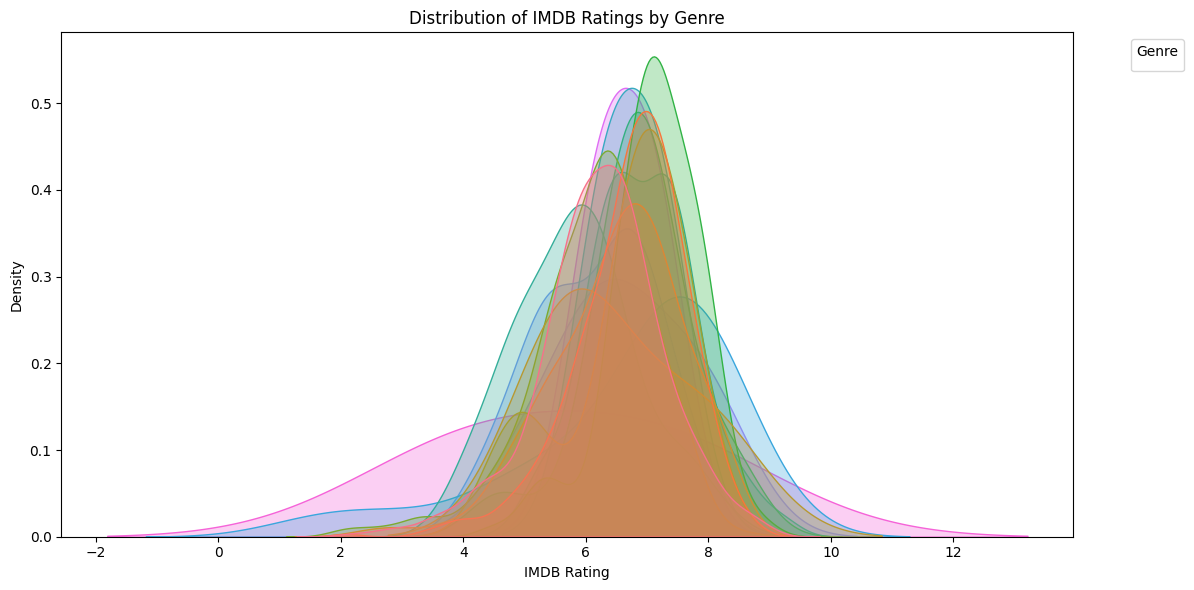

In [22]:
# Table with rating distribution statistics by genre
rating_stats = (
    movies.groupby('genre')['rating']
    .agg(['mean', 'min', 'max', 'median', 'std', 'count'])
    .reset_index()
    .sort_values('mean', ascending=False)
)
rating_stats.round(2)
display(rating_stats)

# Density plot of ratings by genre
plt.figure(figsize=(12, 6))
sns.kdeplot(data=movies, x='rating', hue='genre', common_norm=False, fill=True, alpha=0.3)
plt.title('Distribution of IMDB Ratings by Genre')
plt.xlabel('IMDB Rating')
plt.ylabel('Density')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Challenge - Produce a table of your own choosing, something you think is important/interesting to have data for, justify your result by writting a 2 sentence explanation/interpretation of the result.**

In [23]:
# Table: Average IMDB rating and gross earnings by director (top 10 by average rating, min 3 movies)
director_stats = (
    movies.groupby('director')
    .agg(
        movie_count=('title', 'count'),
        avg_rating=('rating', 'mean'),
        avg_gross=('gross', 'mean')
    )
    .query('movie_count >= 3')
    .sort_values('avg_rating', ascending=False)
    .head(10)
    .reset_index()
)

director_stats.round(2)
display(director_stats)

print(
    "This table highlights directors with consistently high IMDB ratings across multiple movies, "
    "showing both their average rating and average box office gross. Directors who maintain high ratings "
    "over several films may indicate sustained quality and audience appeal, which can also correlate with financial success."
)

,director,movie_count,avg_rating,avg_gross
0,Christopher Nolan,8,8.425000,2.266534e+08
1,Pete Docter,3,8.233333,3.131138e+08
2,Quentin Tarantino,8,8.200000,7.801745e+07
3,Frank Darabont,4,7.975000,5.463288e+07
4,James Cameron,6,7.883333,3.182877e+08
5,Joss Whedon,3,7.866667,3.692024e+08
6,Alejandro G. Inarritu,3,7.866667,8.074011e+07
7,Paul Greengrass,4,7.850000,1.354396e+08
8,Spike Jonze,3,7.833333,2.355362e+07
9,Peter Jackson,5,7.780000,2.127638e+08


This table highlights directors with consistently high IMDB ratings across multiple movies, showing both their average rating and average box office gross. Directors who maintain high ratings over several films may indicate sustained quality and audience appeal, which can also correlate with financial success.


#### Use visualisation to answer the following questions

**Examine the relationship between `gross` and `cast_facebook_likes`. Produce a scatterplot and write one sentence discussing whether the number of facebook likes that the cast has received is likely to be a good predictor of how much money a movie will make at the box office. What variable are you going to map to the Y- and X- axes?**

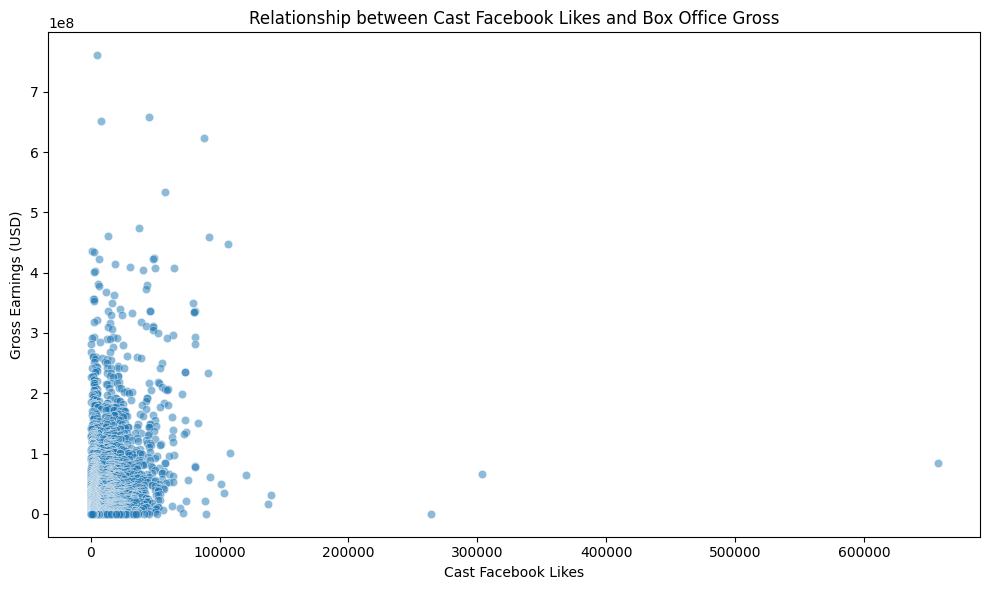

In [24]:
# Scatterplot: gross vs cast_facebook_likes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies, x='cast_facebook_likes', y='gross', alpha=0.5)
plt.xlabel('Cast Facebook Likes')
plt.ylabel('Gross Earnings (USD)')
plt.title('Relationship between Cast Facebook Likes and Box Office Gross')
plt.tight_layout()
plt.show()


**Examine the relationship between `gross` and `budget`. Produce a scatterplot and write one sentence discussing whether budget is likely to be a good predictor of how much money a movie will make at the box office.**

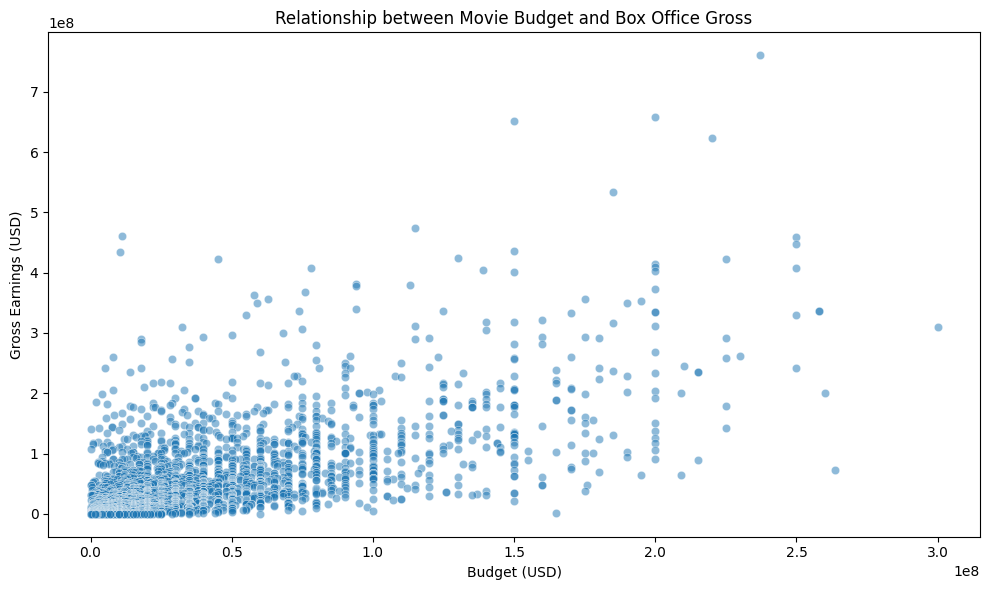

The scatterplot shows a positive relationship between budget and gross earnings, suggesting that movies with higher budgets tend to make more money at the box office, although there is considerable variability.


In [25]:
# Scatterplot: gross vs budget
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies, x='budget', y='gross', alpha=0.5)
plt.xlabel('Budget (USD)')
plt.ylabel('Gross Earnings (USD)')
plt.title('Relationship between Movie Budget and Box Office Gross')
plt.tight_layout()
plt.show()


print(
    "The scatterplot shows a positive relationship between budget and gross earnings, suggesting that movies with higher budgets tend to make more money at the box office, although there is considerable variability."
)

**Examine the relationship between `gross` and `rating`. Produce a scatterplot, faceted by `genre` and discuss whether IMDB ratings are likely to be a good predictor of how much money a movie will make at the box office. Is there anything strange in this dataset?**

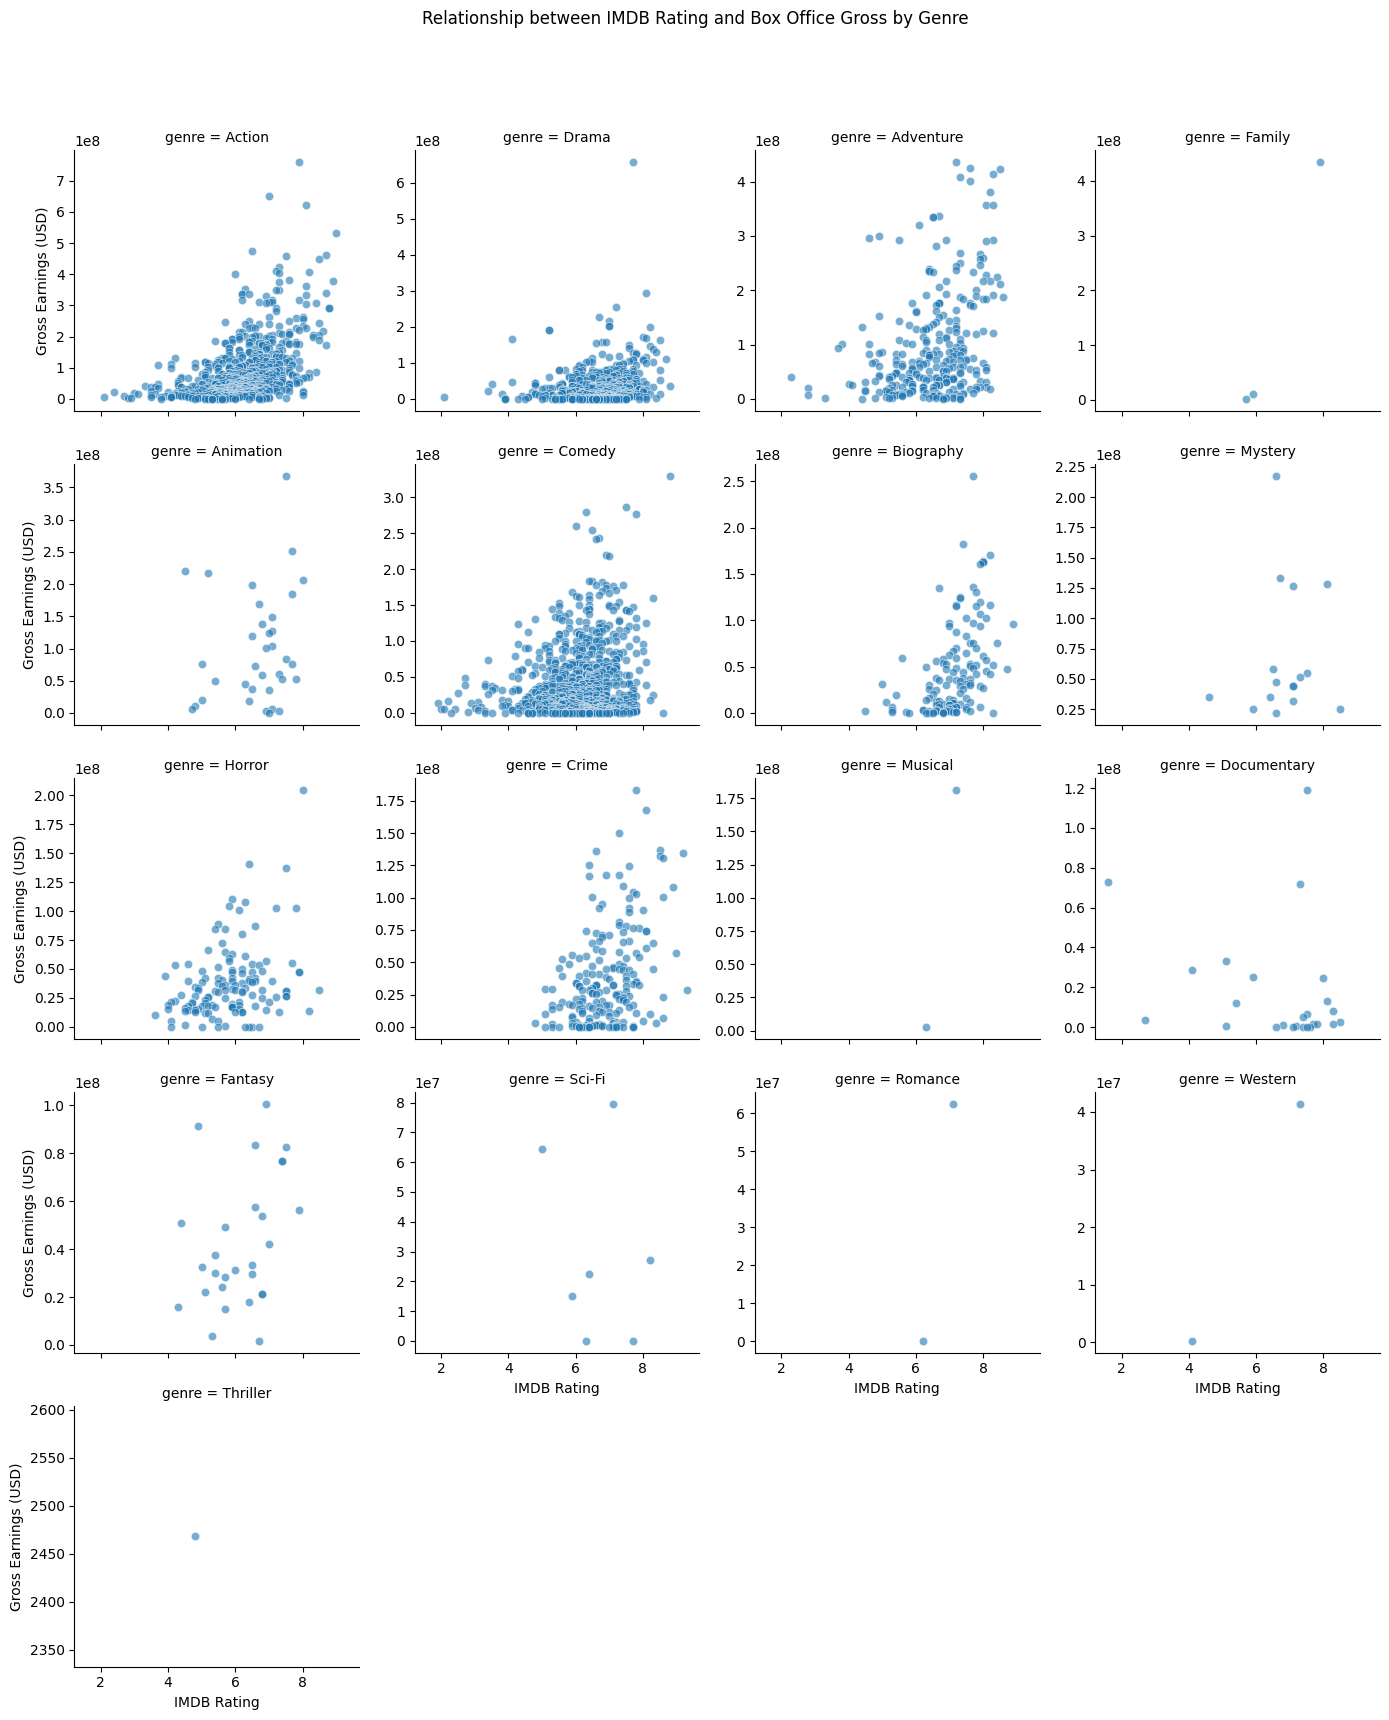

Across most genres, there is no strong visible correlation between IMDB rating and box office gross, suggesting ratings are not a reliable predictor of earnings. Some genres show outliers with very high gross regardless of rating, and the 'Thriller' genre contains a single data point with extremely low gross, which is unusual and may indicate a data issue.


In [26]:
# Scatterplot: gross vs rating, faceted by genre
g = sns.FacetGrid(movies, col="genre", col_wrap=4, height=3.5, sharey=False, sharex=True)
g.map_dataframe(sns.scatterplot, x="rating", y="gross", alpha=0.6)
g.set_axis_labels("IMDB Rating", "Gross Earnings (USD)")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Relationship between IMDB Rating and Box Office Gross by Genre")
plt.show()

print(
    "Across most genres, there is no strong visible correlation between IMDB rating and box office gross, suggesting ratings are not a reliable predictor of earnings. "
    "Some genres show outliers with very high gross regardless of rating, and the 'Thriller' genre contains a single data point with extremely low gross, which is unusual and may indicate a data issue."
)

**Challenge - Produce a visualisation of your choosing, something you think is important to explore/investigate visually. Do make it a comprehensive graph and not a single histogram or density plot. Make it publication ready, label your axes, give it a title, choose colouring options, appropirately formatted text etc.**

In [ ]:
# Visualisation: Trend of IMDB Ratings Over Time by Genre

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=movies,
    x='year',
    y='rating',
    hue='genre',
    estimator='mean',
    errorbar=('ci', 95),
    palette='tab10',
    linewidth=2
)
plt.title('Average IMDB Rating Over Time by Genre', fontsize=18, fontweight='bold')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Average IMDB Rating', fontsize=14)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
print(movies.columns)
print(
    "This graph shows how the average IMDB rating for each genre has changed over time, revealing trends in audience preferences and genre popularity. "
    "For example, some genres may show increasing ratings, indicating improving quality or changing tastes, while others remain stable or decline."
)

### Deliverables

Poduce a clean, stand-alone notebook (or HTML export) with:

All tables/plots properly labeled

Brief interpretations where requested

Upload final HTML/Notebook.